In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.Salary.value_counts(normalize=True)

,proportion
Salary,
39343.0,0.033333
46205.0,0.033333
122391.0,0.033333
112635.0,0.033333
116969.0,0.033333
105582.0,0.033333
109431.0,0.033333
113812.0,0.033333
101302.0,0.033333


In [ ]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


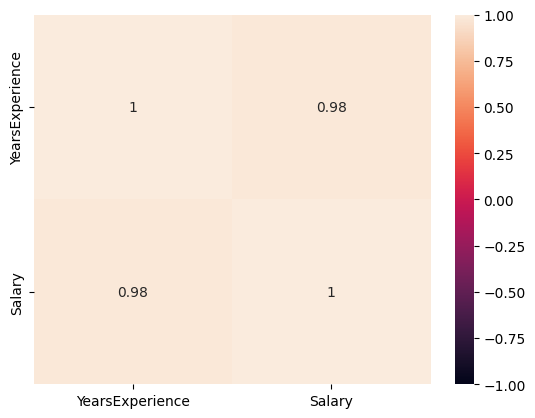

In [ ]:
sns.heatmap(data.corr(),vmin=-1,annot=True)
plt.show()

In [ ]:
import scipy.stats as stats
z_scores = stats.zscore(data)
threshold=3
outliers_data = data[(z_scores>threshold).any(axis=1)]
data = data[(z_scores <=threshold).any(axis=1)]
print("Size after removing outliers:",data.shape)

Size after removing outliers: (30, 2)


In [ ]:
outliers_data.head()

,YearsExperience,Salary


<Axes: >

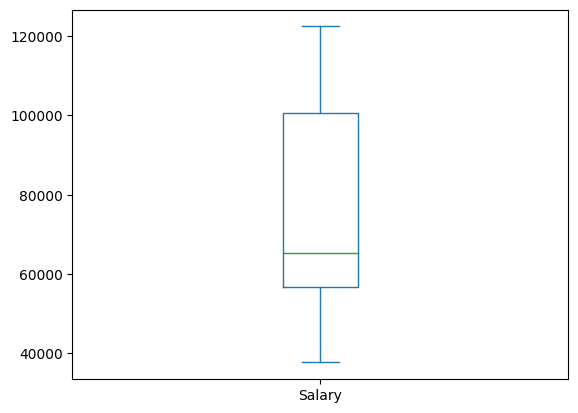

In [ ]:
data.Salary.plot(kind="box")


<Axes: >

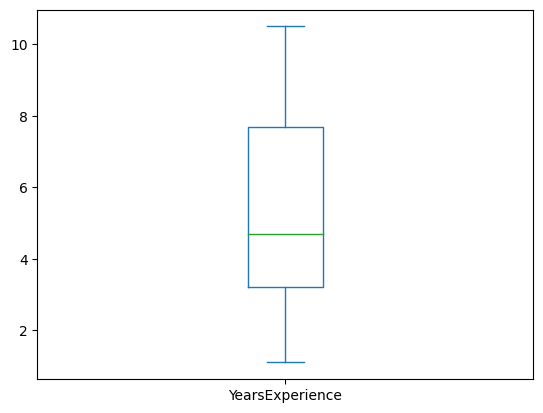

In [ ]:
data.YearsExperience.plot(kind='box')

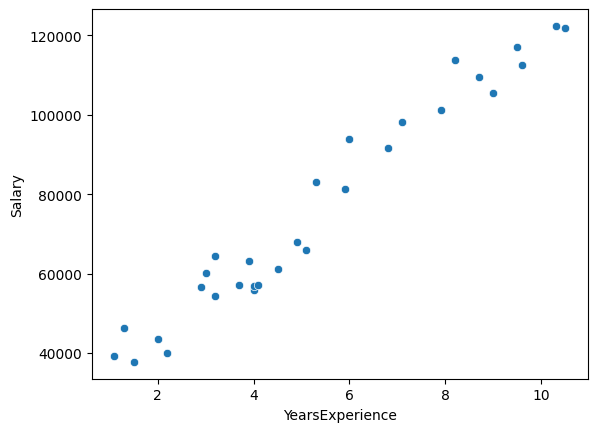

In [ ]:
sns.scatterplot(x=data.YearsExperience,y=data.Salary,data=data)
plt.show()

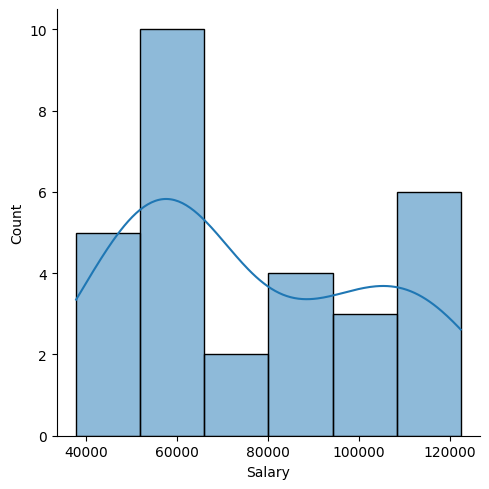

In [ ]:
sns.displot(x=data.Salary,data=data,kde=True)
plt.show()

In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
X = data['YearsExperience']
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [ ]:
y = data['Salary']
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.values.reshape(-1, 1))
data_scaled = pd.DataFrame(scaler.transform(X.values.reshape(-1, 1)), columns=['YearsExperience_scaled'])


In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = [('SVR', SVR()), ('Lasso', Lasso()), ('Ridge', Ridge()), ('ElasticNet', ElasticNet()), ('GradientBoostingRegressor', GradientBoostingRegressor())]
for name, model in models:
    print(name)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("r2 score", r2_score(y_test, y_pred))
    print("\n")
    print("mean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\n")
    print("mean squared error:", mean_squared_error(y_test, y_pred))
    print("\n")

SVR

r2 score -0.6144172635723606


mean absolute error: 29318.0490409006


mean squared error: 1414588669.7414362


Lasso

r2 score 0.971163401844565


mean absolute error: 4048.3924546516696


mean squared error: 25267275.037868112


Ridge

r2 score 0.9728374986398185


mean absolute error: 3967.71417443179


mean squared error: 23800393.821932748


ElasticNet

r2 score 0.9828664478693188


mean absolute error: 3142.2957510472747


mean squared error: 15012803.23455832


GradientBoostingRegressor

r2 score 0.955900224385942


mean absolute error: 5255.711260630872


mean squared error: 38641213.97199743


